<a href="https://colab.research.google.com/github/revanthkrishnasai00/deepfake_detection/blob/main/deep_fakedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install mtcnn opencv-python-headless scikit-image


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn.mtcnn import MTCNN
from skimage.metrics import mean_squared_error as mse
import os


In [ ]:
# Function to extract frames from a video
def extract_frames(video_path, max_frames=100):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0

    while cap.isOpened() and count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
        count += 1

    cap.release()
    return frames

# Function to detect faces in a frame using MTCNN
def detect_faces(frame):
    detector = MTCNN()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = detector.detect_faces(frame_rgb)

    # Extract the bounding boxes
    faces = []
    for result in results:
        x, y, width, height = result['box']
        # Crop the detected face
        face = frame[y:y+height, x:x+width]
        faces.append(face)
    return faces

# Function to calculate Mean Squared Error (MSE) between two images
def calculate_mse(imageA, imageB):
    # Ensure images are the same size
    if imageA.shape != imageB.shape:
        return None
    return mse(imageA, imageB)


In [ ]:
# Function to get face crops from video
def extract_faces_from_video(video_path, max_frames=100):
    frames = extract_frames(video_path, max_frames)
    all_faces = []

    for frame in frames:
        faces = detect_faces(frame)
        if faces:
            all_faces.extend(faces)  # Append detected faces to the list

    return all_faces


In [ ]:
# File paths for real and fake videos
real_video_path = "/content/t1_r1.mp4"  # Replace with actual file path
fake_video_path = "/content/t1_f1.mp4"  # Replace with actual file path

# Extract faces from the videos
real_faces = extract_faces_from_video(real_video_path)
fake_faces = extract_faces_from_video(fake_video_path)

# Check if faces were successfully extracted
print(f"Extracted {len(real_faces)} faces from real video")
print(f"Extracted {len(fake_faces)} faces from fake video")


Extracted 30 faces from real video
Extracted 105 faces from fake video


In [ ]:
# Function to compare faces between two sets using MSE
def compare_faces(real_faces, fake_faces):
    if not real_faces or not fake_faces:
        print("No faces to compare.")
        return

    similarities = []

    # Compare each face from real_faces with fake_faces
    for real_face in real_faces:
        for fake_face in fake_faces:
            # Resize faces to the same dimensions if needed
            fake_face_resized = cv2.resize(fake_face, (real_face.shape[1], real_face.shape[0]))

            # Calculate Mean Squared Error
            error = calculate_mse(real_face, fake_face_resized)
            if error is not None:
                similarities.append(error)

    return similarities

# Run the comparison
similarities = compare_faces(real_faces, fake_faces)

# Print similarity results
if similarities:
    avg_similarity = np.mean(similarities)
    print(f"Average MSE similarity score between real and fake faces: {avg_similarity}")
else:
    print("No similarities could be calculated.")


Average MSE similarity score between real and fake faces: 5144.943394865192


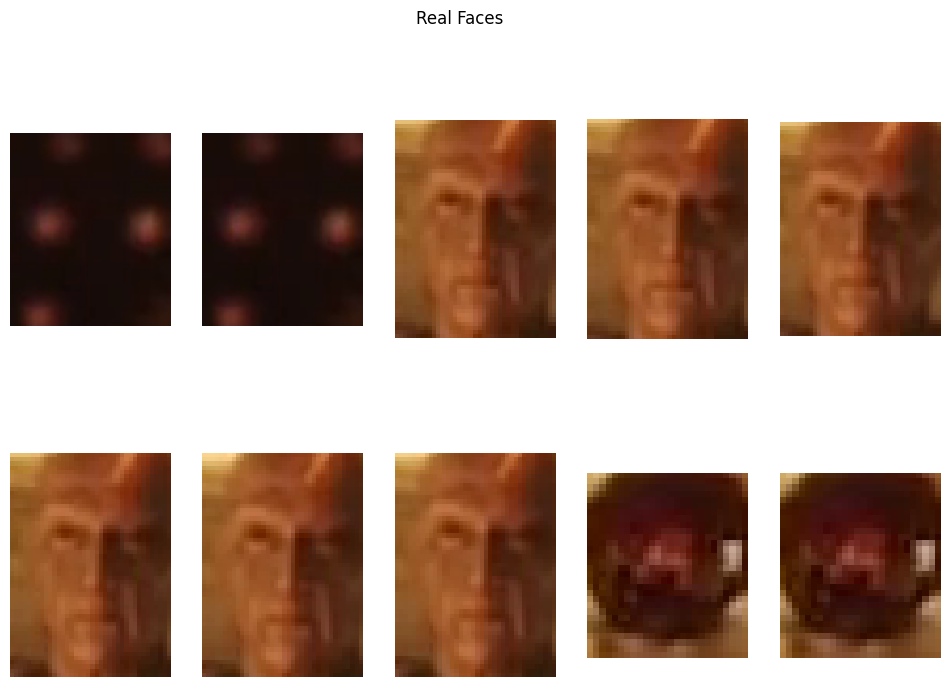

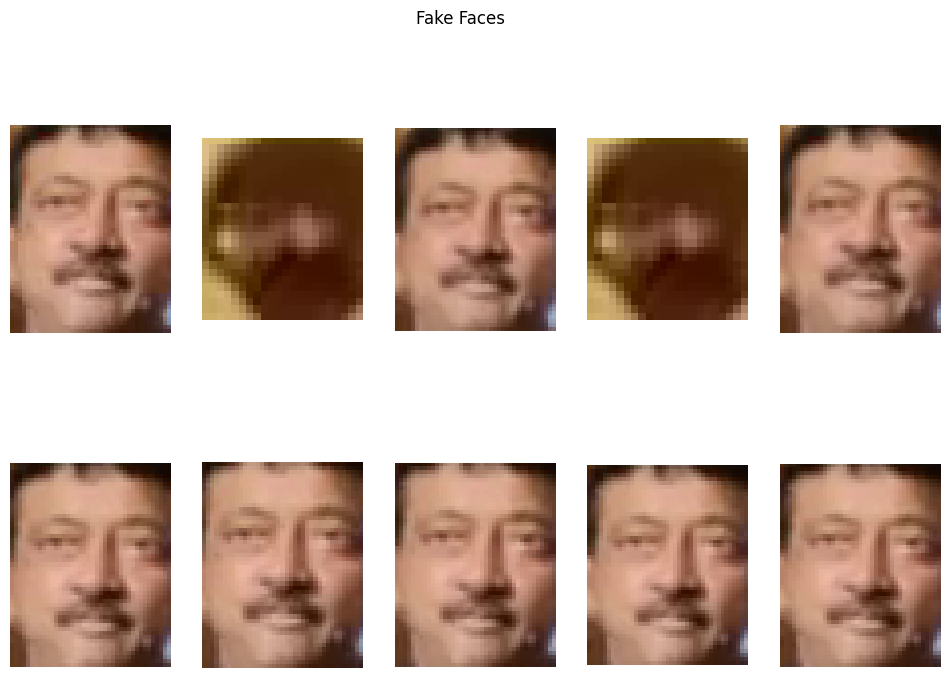

In [ ]:
# Function to display detected faces
def display_faces(faces, title='Detected Faces'):
    plt.figure(figsize=(12, 8))
    for i, face in enumerate(faces[:10]):  # Display up to 10 faces
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display real and fake faces
display_faces(real_faces, title='Real Faces')
display_faces(fake_faces, title='Fake Faces')
